# School Enrollment by Neighborhood Breakdown

The purpose of this notebook is to analyze the school enrollment rates for each neighborhood in the Pittsburgh area by utilizing a dataset pulled from the Western Pennsylvania Regional Data Center. Alongside the other metrics, this analysis will be used to determine the "best" neighborhood in Pittsburgh. 

Like employment, school enrollment rates can act as a metric for how developed, economically stable, and quality of life. School enrollment rates are unique in this aspect, as they catalogue numbers typically filled by children and younger adults. This difference in perspective is crucial in determining the best neighborhood in Pittsburgh. 

# The Dataset 

THe dataset used in this analysis is the "Pittsburgh American Community Survey; School Enrollment" provided to the WPRDC website in 2015. 

By row, each neighborhood is listed in alphabetical order; by column, total enrolled persons is listed by grade, ranging from nursery school up to Graduate or Professional Schools. Each column has an associated margin of error.

The following is the first 10 rows of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("enrollment.csv")
df.head(10)

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, pre",Margin of Error; Enrolled in school: - Enrolled in nursery scho,Estimate; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergradu","Margin of Error; Enrolled in school: - Enrolled in college, und",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,1,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,2,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,3,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,4,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,5,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
5,6,Banksville,6,3787.0,569.215249,402.0,186.180020,28.0,37.749172,0.0,...,15.0,31.240999,25.0,33.376639,23.0,32.924155,99.0,93.616238,3385.0,509.464425
6,7,Bedford Dwellings,7,1251.0,149.000000,337.0,121.000000,28.0,34.000000,57.0,...,22.0,20.000000,12.0,19.000000,24.0,20.000000,0.0,10.000000,914.0,102.000000
7,8,Beechview,8,7770.0,685.333495,1783.0,313.268256,145.0,74.337070,47.0,...,26.0,36.959437,80.0,58.497863,559.0,142.112631,210.0,83.731714,5987.0,543.243960
8,9,Beltzhoover,9,1609.0,310.282130,342.0,137.640837,19.0,24.979992,0.0,...,40.0,49.203658,24.0,37.269290,140.0,76.642025,6.0,20.000000,1267.0,242.159039
9,10,Bloomfield,10,8498.0,469.304805,2185.0,264.384190,39.0,32.908965,30.0,...,27.0,38.961519,88.0,63.340350,693.0,166.027106,983.0,181.526858,6313.0,385.164900


This table is messy and confusing, some of this data unecessary and confusing. A trimmed version of this dataset is warrented and created as so.

In [3]:
#Generalize some of the data
#Create a column for total estimate in Primary school grades (k-5)
df["Estimate; Enrolled in school: - Enrolled in Primary School"] = df["Estimate; Enrolled in school: - Enrolled in kindergarten"] + df["Estimate; Enrolled in school: - Enrolled in grade 1"] + df["Estimate; Enrolled in school: - Enrolled in grade 2"] + df["Estimate; Enrolled in school: - Enrolled in grade 3"] + df["Estimate; Enrolled in school: - Enrolled in grade 4"] + df["Estimate; Enrolled in school: - Enrolled in grade 5"]

#Create a column for total estimate in Middle school grades (6-8)
df["Estimate; Enrolled in school: - Enrolled in Middle School"] = df["Estimate; Enrolled in school: - Enrolled in grade 6"] + df["Estimate; Enrolled in school: - Enrolled in grade 7"] + df["Estimate; Enrolled in school: - Enrolled in grade 8"]

#Create a column for total estimate in High school grades (9-12)
df["Estimate; Enrolled in school: - Enrolled in High School"] = df["Estimate; Enrolled in school: - Enrolled in grade 9"] + df["Estimate; Enrolled in school: - Enrolled in grade 10"] + df["Estimate; Enrolled in school: - Enrolled in grade 11"] + df["Estimate; Enrolled in school: - Enrolled in grade 12"]


#Create a trimmed dataset using the newly created generalized columns and select others from the original dataset

df_trimmed = df[[
    "Neighborhood",
    "Estimate; Total:",
    "Estimate; Enrolled in school: - Enrolled in Primary School",
    "Estimate; Enrolled in school: - Enrolled in Middle School",
    "Estimate; Enrolled in school: - Enrolled in High School",
    "Estimate; Enrolled in school: - Enrolled in college, undergradu",
    "Estimate; Enrolled in school: - Graduate or professional school",
    "Estimate; Not enrolled in school"]].copy()

#Display the first 10 to see if the code works
df_trimmed.head(10)


,Neighborhood,Estimate; Total:,Estimate; Enrolled in school: - Enrolled in Primary School,Estimate; Enrolled in school: - Enrolled in Middle School,Estimate; Enrolled in school: - Enrolled in High School,"Estimate; Enrolled in school: - Enrolled in college, undergradu",Estimate; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school
0,Allegheny Center,1389.0,79.0,29.0,37.0,150.0,51.0,995.0
1,Allegheny West,343.0,16.0,0.0,18.0,2.0,25.0,282.0
2,Allentown,2520.0,411.0,133.0,203.0,125.0,74.0,1555.0
3,Arlington,1823.0,99.0,57.0,106.0,142.0,16.0,1396.0
4,Arlington Heights,213.0,0.0,0.0,0.0,12.0,0.0,173.0
5,Banksville,3787.0,152.0,47.0,53.0,23.0,99.0,3385.0
6,Bedford Dwellings,1251.0,128.0,65.0,92.0,24.0,0.0,914.0
7,Beechview,7770.0,446.0,194.0,229.0,559.0,210.0,5987.0
8,Beltzhoover,1609.0,43.0,36.0,98.0,140.0,6.0,1267.0
9,Bloomfield,8498.0,145.0,166.0,159.0,693.0,983.0,6313.0


Now that the code is sorted much better, we can plot these numbers onto a visual for easier comprehension

# What does ranking each neighborhood's data accomplish?

Ranking each neighborhood's data allows us to compare accessability and consistancy of education between neighborhoods.

Though this raw data does not account for general neighborhood population, the numbers are valuable nonetheless. Additionally, some math can be utilized to derive percentages from the totals of each neighborhood, potentially reaching more accurate rates.

# Graph Time

# Top 10 Neighborhoods Ranked by Total in Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed people. It derives its ranking from the "Estimate; Total" column.

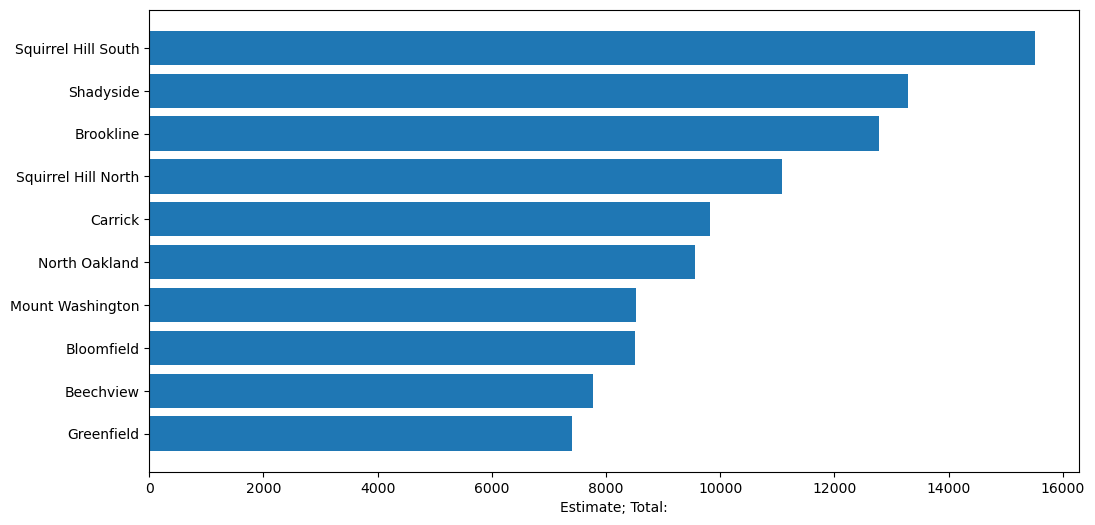

In [7]:
sorted_total = df_trimmed.sort_values(by="Estimate; Total:", ascending=False)
graphed_total = sorted_total.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_total["Neighborhood"], graphed_total["Estimate; Total:"])
plt.xlabel("Estimate; Total:")
plt.gca().invert_yaxis()
plt.show()

# Column Breakdown

## Top 10 Neighborhoods Ranked by Total Primary School Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed primary school attendees. It derives its ranking from the "Estimate; Enrolled in school: - Enrolled in Primary School" column.

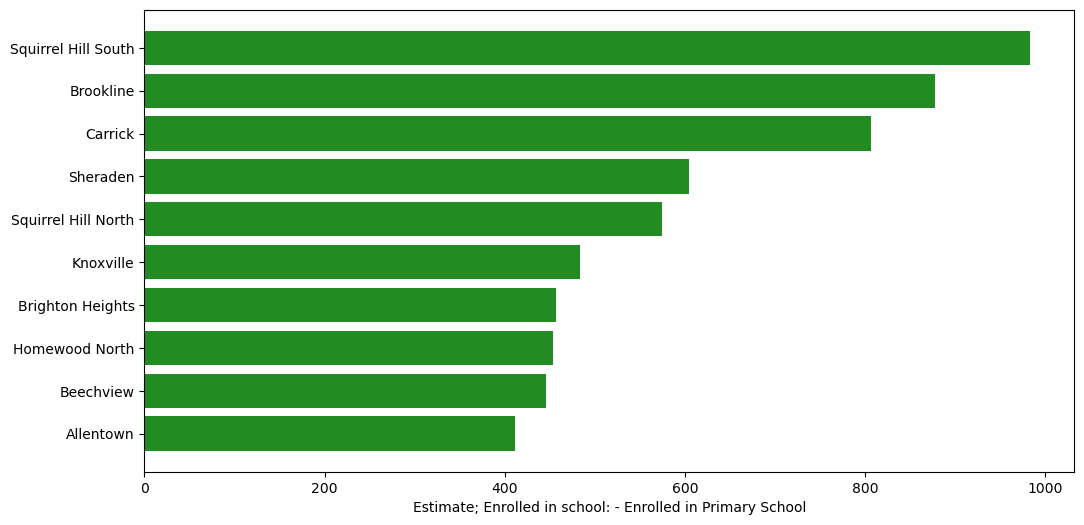

In [8]:
sorted_primary = df_trimmed.sort_values(by="Estimate; Enrolled in school: - Enrolled in Primary School", ascending=False)
graphed_primary = sorted_primary.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_primary["Neighborhood"], graphed_primary["Estimate; Enrolled in school: - Enrolled in Primary School"], color="ForestGreen")
plt.xlabel("Estimate; Enrolled in school: - Enrolled in Primary School")
plt.gca().invert_yaxis()
plt.show()

## Top 10 Neighborhoods Ranked by Total Middle School Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed middle school attendees. It derives its ranking from the "Estimate; Enrolled in school: - Enrolled in Middle School" column.

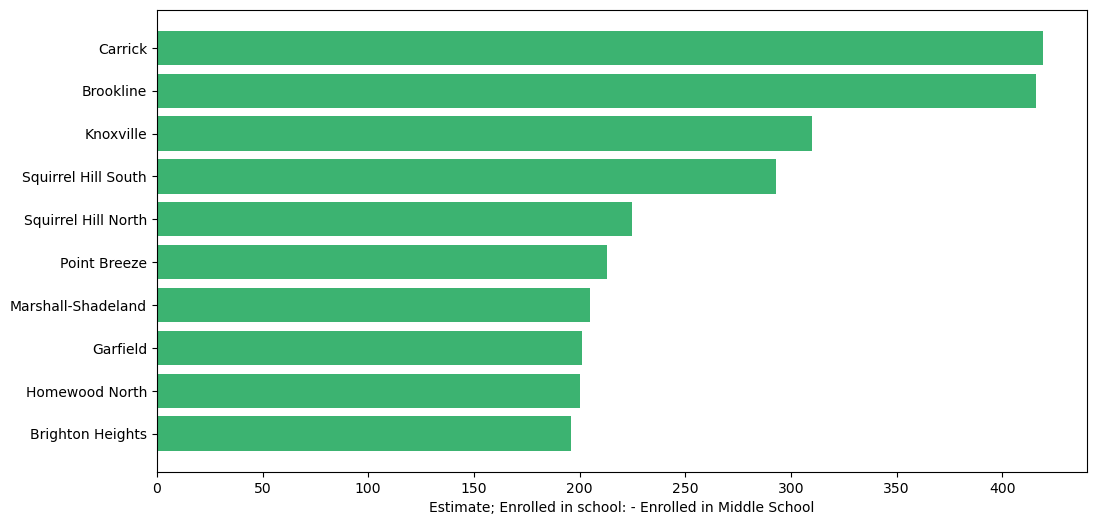

In [11]:
sorted_middle = df_trimmed.sort_values(by="Estimate; Enrolled in school: - Enrolled in Middle School", ascending=False)
graphed_middle = sorted_middle.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_middle["Neighborhood"], graphed_middle["Estimate; Enrolled in school: - Enrolled in Middle School"], color="MediumSeaGreen")
plt.xlabel("Estimate; Enrolled in school: - Enrolled in Middle School")
plt.gca().invert_yaxis()
plt.show()

## Top 10 Neighborhoods Ranked by Total High School Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed high school attendees. It derives its ranking from the "Estimate; Enrolled in school: - Enrolled in High School" column.

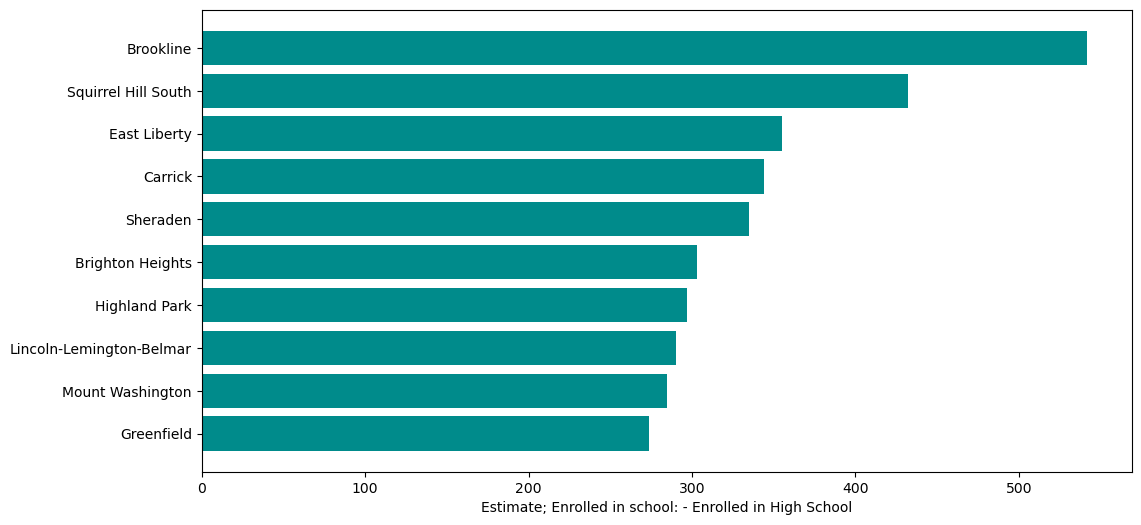

In [13]:
sorted_high = df_trimmed.sort_values(by="Estimate; Enrolled in school: - Enrolled in High School", ascending=False)
graphed_high = sorted_high.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_high["Neighborhood"], graphed_high["Estimate; Enrolled in school: - Enrolled in High School"], color="DarkCyan")
plt.xlabel("Estimate; Enrolled in school: - Enrolled in High School")
plt.gca().invert_yaxis()
plt.show()

## Top 10 Neighborhoods Ranked by Total Undergraduate Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed undergraduate population. It derives its ranking from the "Estimate; Enrolled in school: - Enrolled in college, undergradu" column. Yes, it is misspelled on the initial dataset. 

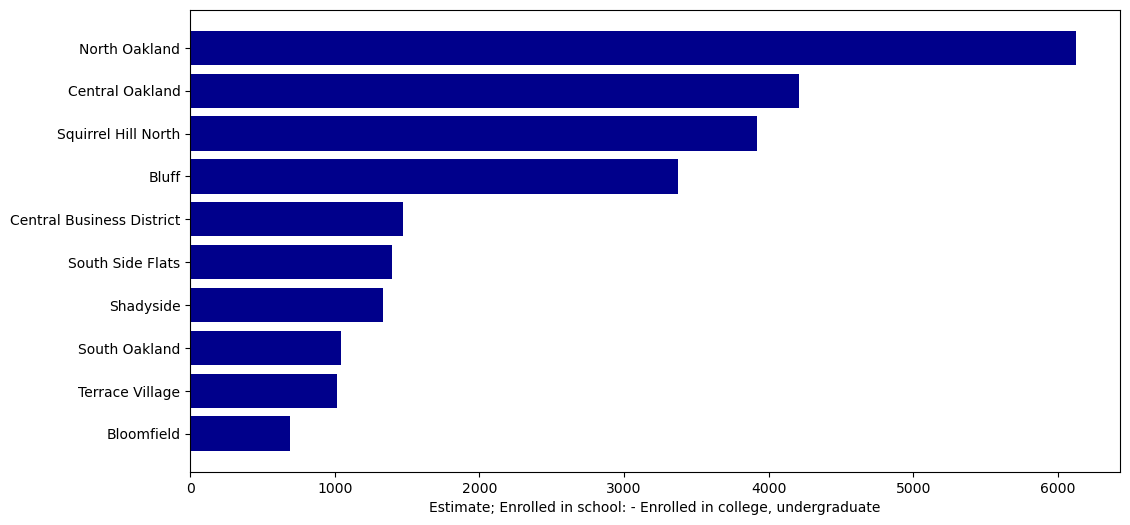

In [18]:
sorted_undergrad = df_trimmed.sort_values(by="Estimate; Enrolled in school: - Enrolled in college, undergradu", ascending=False)
graphed_undergrad = sorted_undergrad.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_undergrad["Neighborhood"], graphed_undergrad["Estimate; Enrolled in school: - Enrolled in college, undergradu"], color="DarkBlue")
plt.xlabel("Estimate; Enrolled in school: - Enrolled in college, undergraduate")
plt.gca().invert_yaxis()
plt.show()

<small>I wonder why the Oaklands are so high on that list</small>

## Top 10 Neighborhoods Ranked by Total Graduate or Prefessional Education

The following graph contains the top 10 neighborhoods ranked according to the estimated total surveyed professional school population. It derives its ranking from the "Estimate; Enrolled in school: - Graduate or professional school" column.

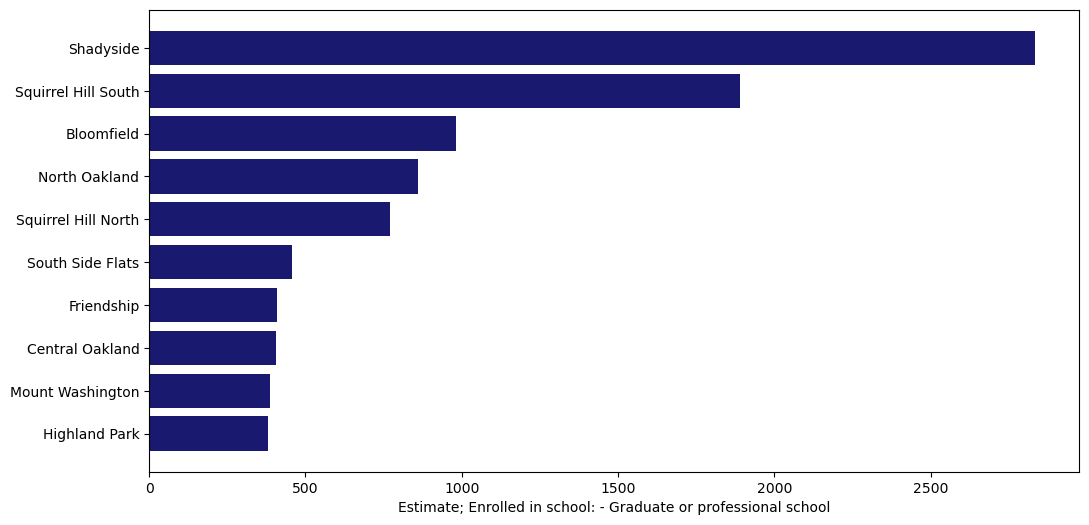

In [17]:
sorted_grad = df_trimmed.sort_values(by="Estimate; Enrolled in school: - Graduate or professional school", ascending=False)
graphed_grad = sorted_grad.head(10)
plt.figure(figsize=(12, 6))
plt.barh(graphed_grad["Neighborhood"], graphed_grad["Estimate; Enrolled in school: - Graduate or professional school"], color="MidnightBlue")
plt.xlabel("Estimate; Enrolled in school: - Graduate or professional school")
plt.gca().invert_yaxis()
plt.show()

# Conclusions

There does not appear to be a definitive "best" neighborhood in terms of education; however, some neighborhoods appear high on the list consistantly. Among them are Squirrel Hill South, Brookline, and Shadyside. These three neighborhoods appear highest and most often among each of the graphs. 

Additionally, the idea of "best" in regards to education is entirely subjective. While accessability is most easily measured using the chosen metric, it neglects to mention other factors of educational quality; furthermore, these such qualities could hardly be ascertained from the dataset alone, thoughough research outside of the dataset is required to determine anything beyond a blanket statements. Despite this, the numerical data could work as a good jumping-off point for more analysis. Finally, the numerical data can be used in tandem with the rest of the project's analyses to determine the best neighborhood in Pittsburgh.